Qualification Shape Detection - TH24-1

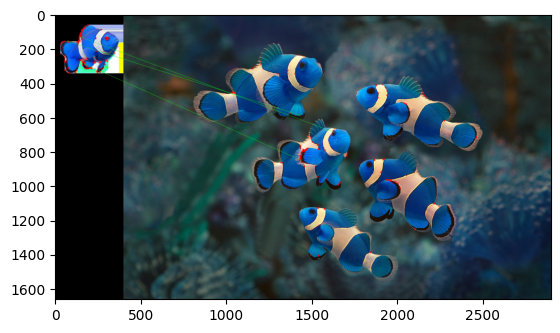

In [12]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import os
import math

img_object = cv2.imread('clownfish.png')
img_scene = cv2.imread('clownfishframe2.jpg')

# Use ORB instead of SURF
orb = cv2.ORB_create()

# Detect keypoints and descriptors with ORB
kp_object, des_object = orb.detectAndCompute(img_object, None)
kp_scene, des_scene = orb.detectAndCompute(img_scene, None)

# FLANN parameters for ORB
FLANN_INDEX_LSH = 6
index_params = dict(algorithm=FLANN_INDEX_LSH, table_number=6, key_size=12, multi_probe_level=1)
search_params = dict(checks=50)

flann = cv2.FlannBasedMatcher(index_params, search_params)

matches = flann.knnMatch(des_object, des_scene, k=2)

matchesMask = [[0, 0] for i in range(len(matches))]

total_match = 0
for i, match in enumerate(matches):
    if len(match) == 2:  # Ensure there are 2 matches to unpack
        m, n = match
        if m.distance < 0.7 * n.distance:       
            matchesMask[i] = [1, 0]
            total_match += 1

img_res = cv2.drawMatchesKnn(
    img_object, kp_object, img_scene,
    kp_scene, matches, None,
    matchColor=[0, 255, 0], 
    singlePointColor=[255, 0, 0], 
    matchesMask=matchesMask
)
plt.imshow(img_res)
plt.show()